# **Activation Functions in Neural Networks**

## Introduction
Activation functions are a critical component of neural networks. Without them, neural networks would just be linear regression models! In this notebook, we'll explore different activation functions, their properties, and when to use each one.

## Why Do We Need Activation Functions?

Activation functions introduce non-linearity into neural networks. This allows networks to learn complex patterns and relationships in the data.

Let's start by importing necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 1. Common Activation Functions

Let's visualize and understand the most common activation functions:


In [2]:
def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

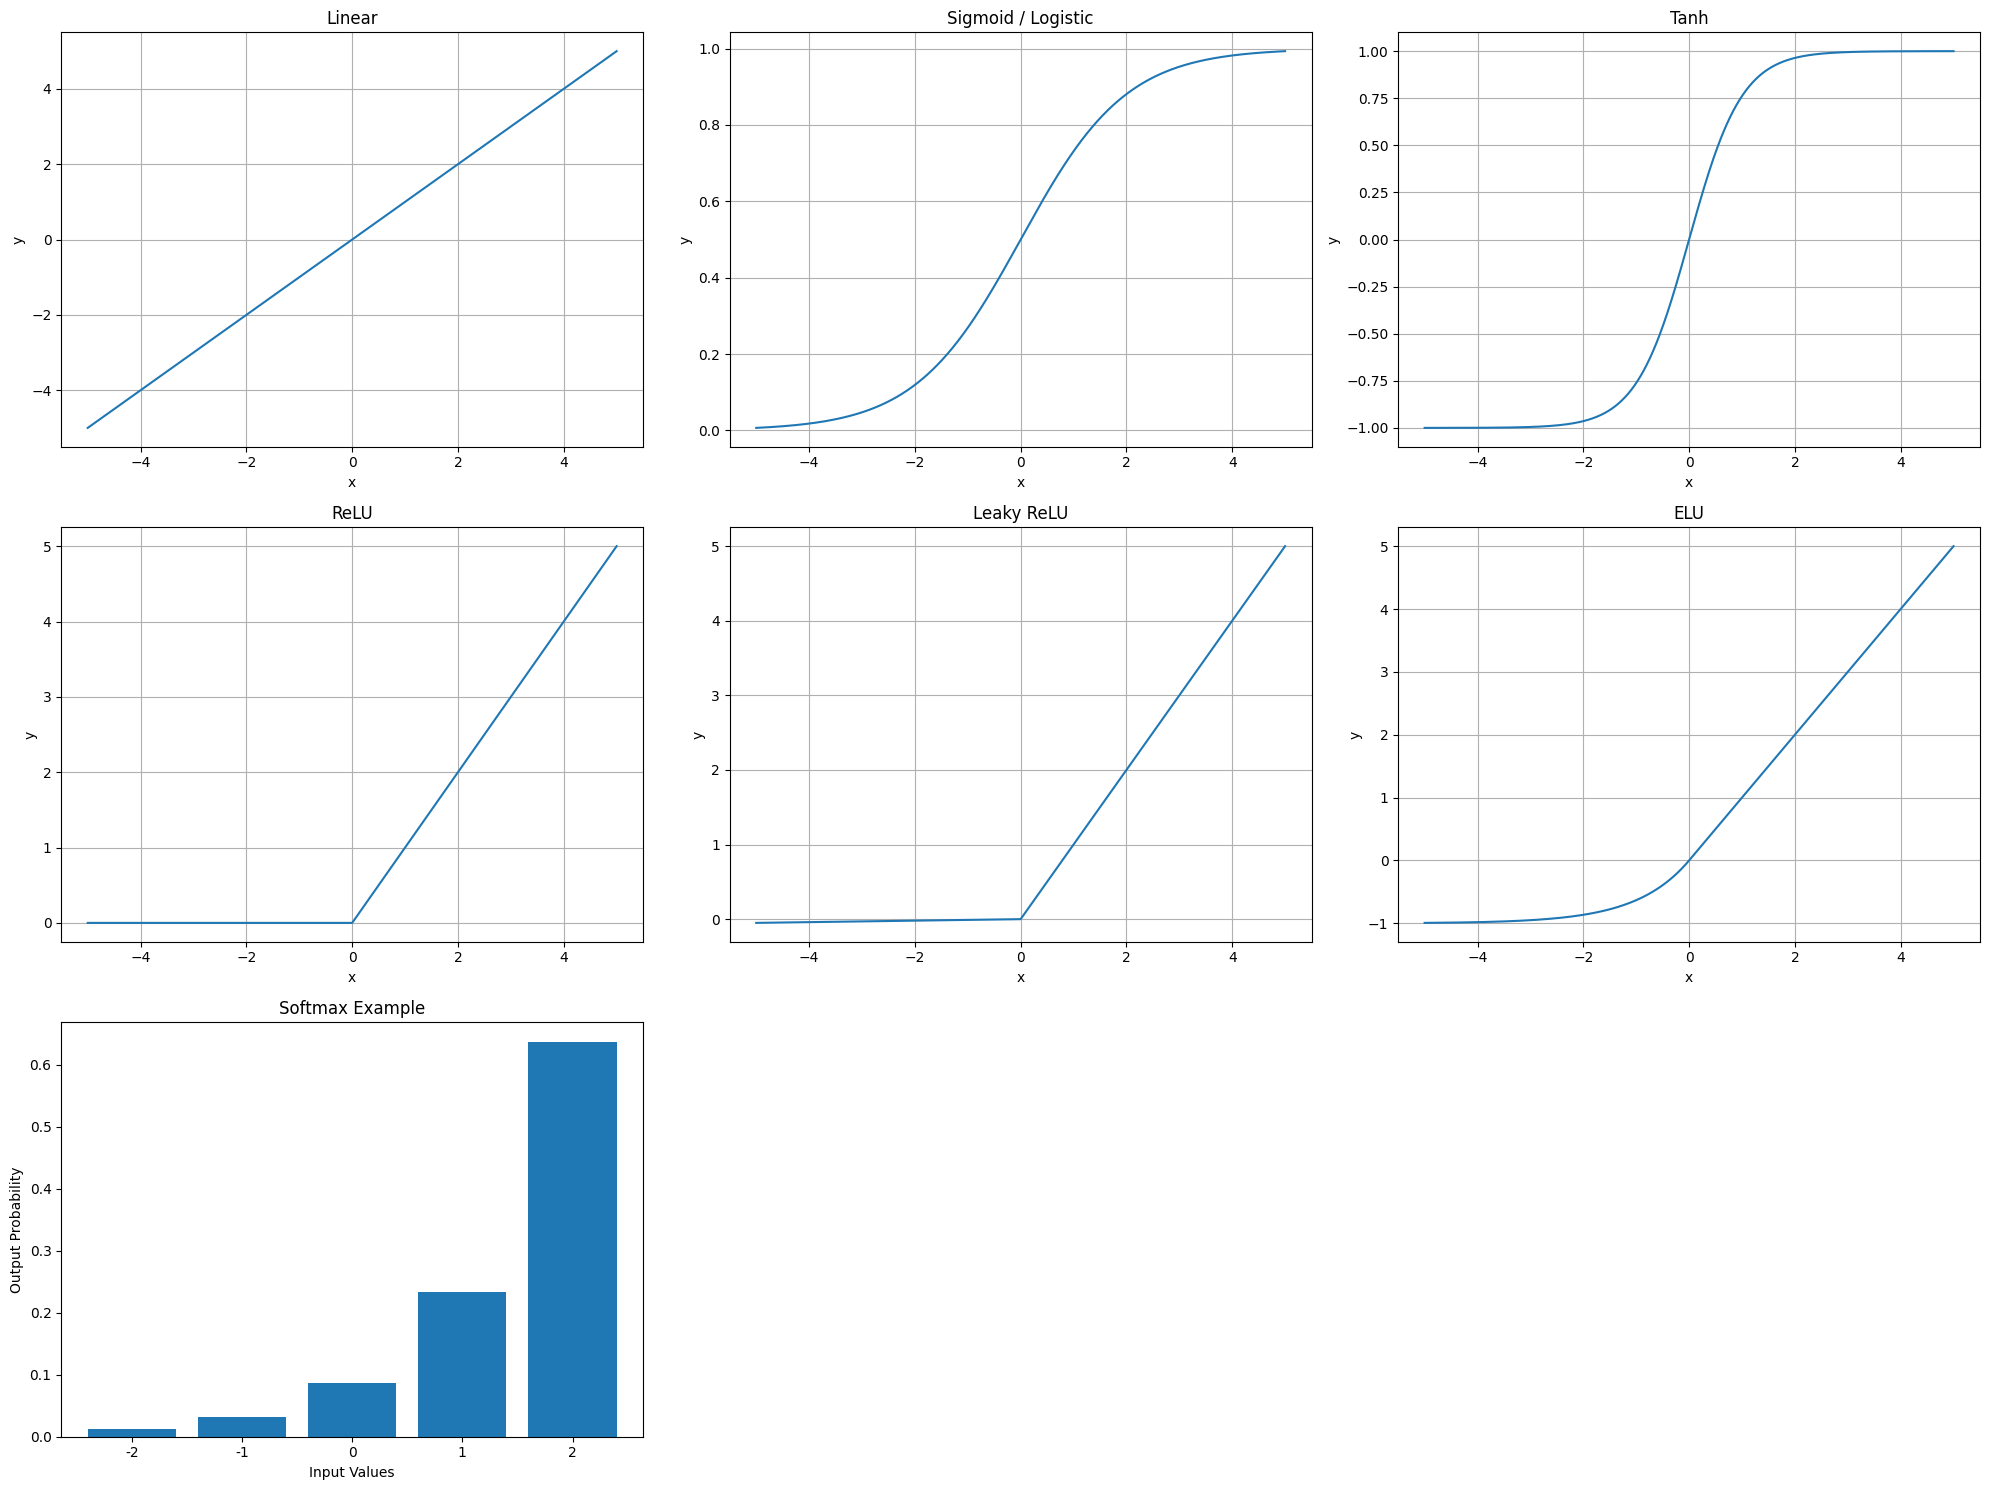

In [3]:
# Plot activation functions
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(20, 15))

# Linear
plt.subplot(3, 3, 1)
plt.plot(x, linear(x))
plt.grid(True)
plt.title('Linear')
plt.xlabel('x')
plt.ylabel('y')

# Sigmoid
plt.subplot(3, 3, 2)
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.title('Sigmoid / Logistic')
plt.xlabel('x')
plt.ylabel('y')

# Tanh
plt.subplot(3, 3, 3)
plt.plot(x, tanh(x))
plt.grid(True)
plt.title('Tanh')
plt.xlabel('x')
plt.ylabel('y')

# ReLU
plt.subplot(3, 3, 4)
plt.plot(x, relu(x))
plt.grid(True)
plt.title('ReLU')
plt.xlabel('x')
plt.ylabel('y')

# Leaky ReLU
plt.subplot(3, 3, 5)
plt.plot(x, leaky_relu(x))
plt.grid(True)
plt.title('Leaky ReLU')
plt.xlabel('x')
plt.ylabel('y')

# ELU
plt.subplot(3, 3, 6)
plt.plot(x, elu(x))
plt.grid(True)
plt.title('ELU')
plt.xlabel('x')
plt.ylabel('y')

# Softmax
plt.subplot(3, 3, 7)
example_values = np.array([-2, -1, 0, 1, 2])
softmax_output = softmax(example_values)
plt.bar(range(len(example_values)), softmax_output)
plt.xticks(range(len(example_values)), example_values)
plt.title('Softmax Example')
plt.xlabel('Input Values')
plt.ylabel('Output Probability')

plt.tight_layout()
plt.show()



## 2. Understanding Derivatives of Activation Functions

The derivatives of activation functions are crucial for backpropagation. Let's visualize them:

In [4]:
def linear_derivative(x):
    return np.ones_like(x)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

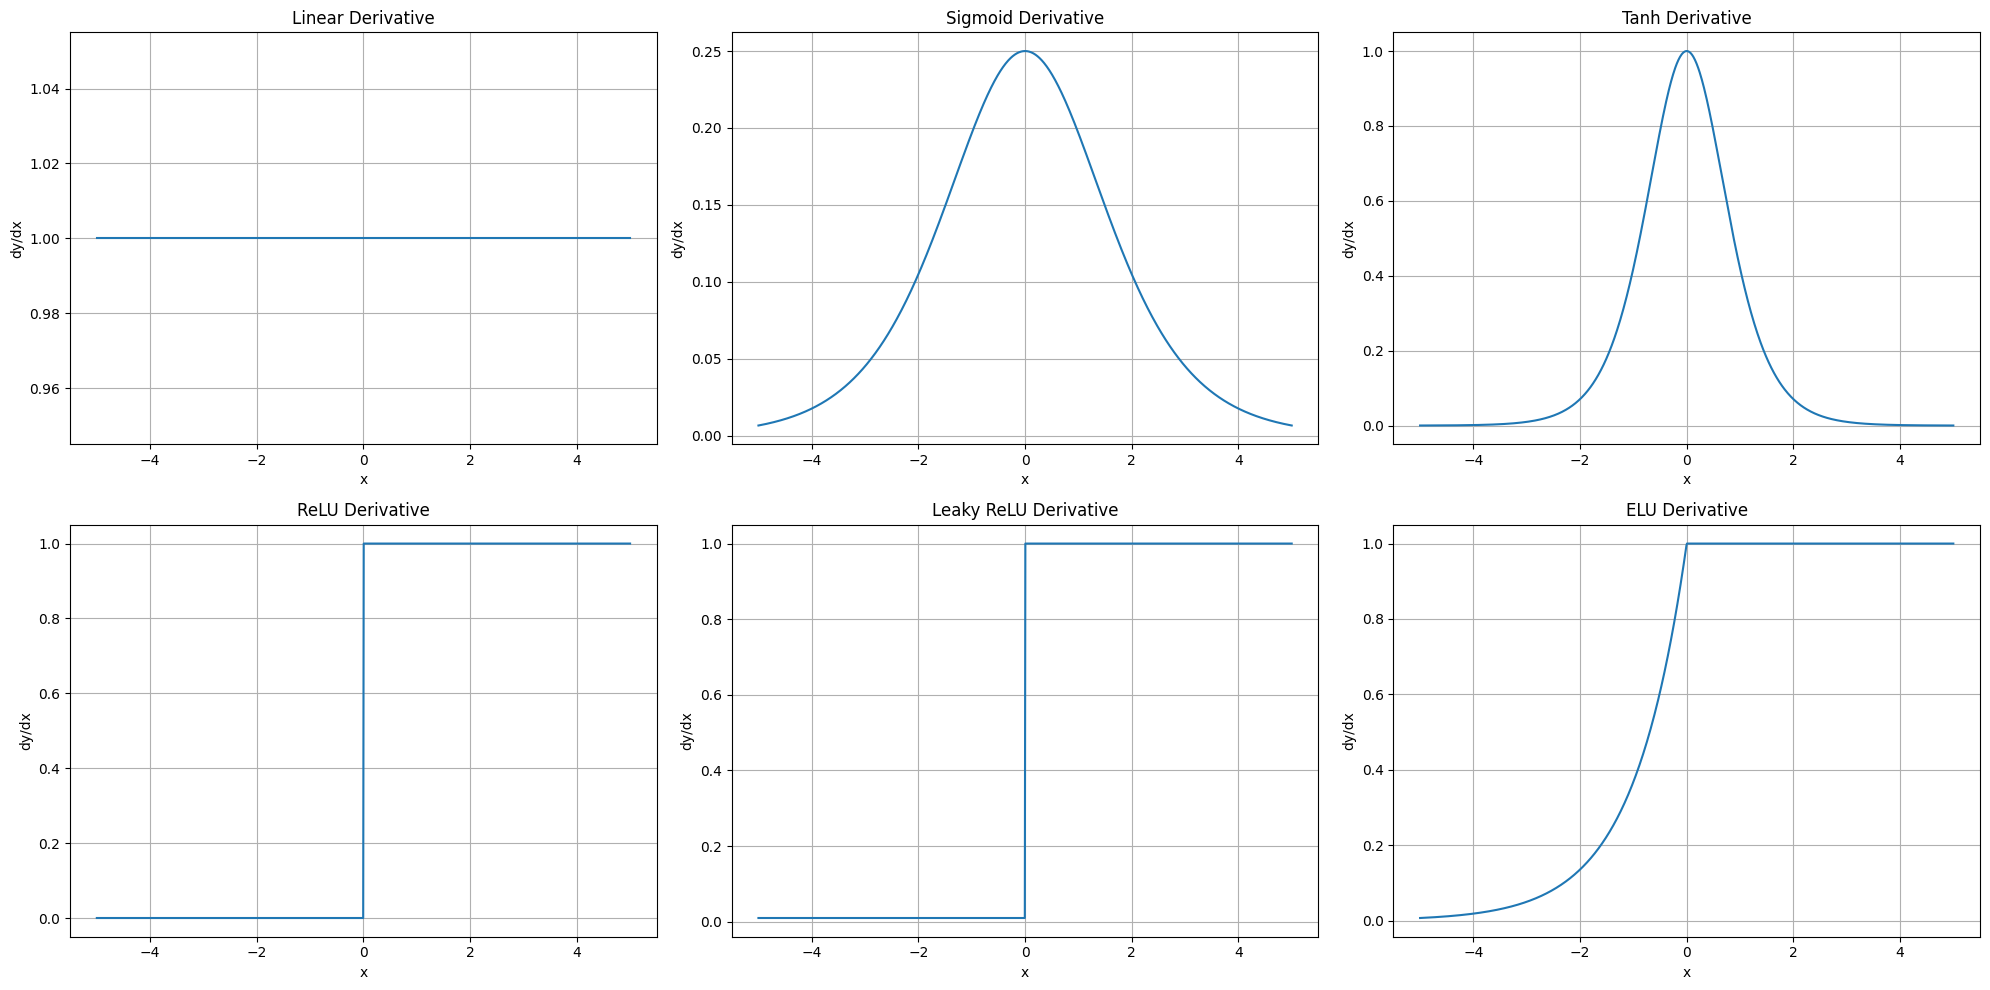

In [5]:
# Plot derivatives
plt.figure(figsize=(20, 10))

# Linear derivative
plt.subplot(2, 3, 1)
plt.plot(x, linear_derivative(x))
plt.grid(True)
plt.title('Linear Derivative')
plt.xlabel('x')
plt.ylabel('dy/dx')

# Sigmoid derivative
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid_derivative(x))
plt.grid(True)
plt.title('Sigmoid Derivative')
plt.xlabel('x')
plt.ylabel('dy/dx')

# Tanh derivative
plt.subplot(2, 3, 3)
plt.plot(x, tanh_derivative(x))
plt.grid(True)
plt.title('Tanh Derivative')
plt.xlabel('x')
plt.ylabel('dy/dx')

# ReLU derivative
plt.subplot(2, 3, 4)
plt.plot(x, relu_derivative(x))
plt.grid(True)
plt.title('ReLU Derivative')
plt.xlabel('x')
plt.ylabel('dy/dx')

# Leaky ReLU derivative
plt.subplot(2, 3, 5)
plt.plot(x, leaky_relu_derivative(x))
plt.grid(True)
plt.title('Leaky ReLU Derivative')
plt.xlabel('x')
plt.ylabel('dy/dx')

# ELU derivative
plt.subplot(2, 3, 6)
plt.plot(x, elu_derivative(x))
plt.grid(True)
plt.title('ELU Derivative')
plt.xlabel('x')
plt.ylabel('dy/dx')

plt.tight_layout()
plt.show()

## 3. Issues with Some Activation Functions

### Vanishing Gradient Problem

# Demonstrate vanishing gradient with sigmoid and tanh


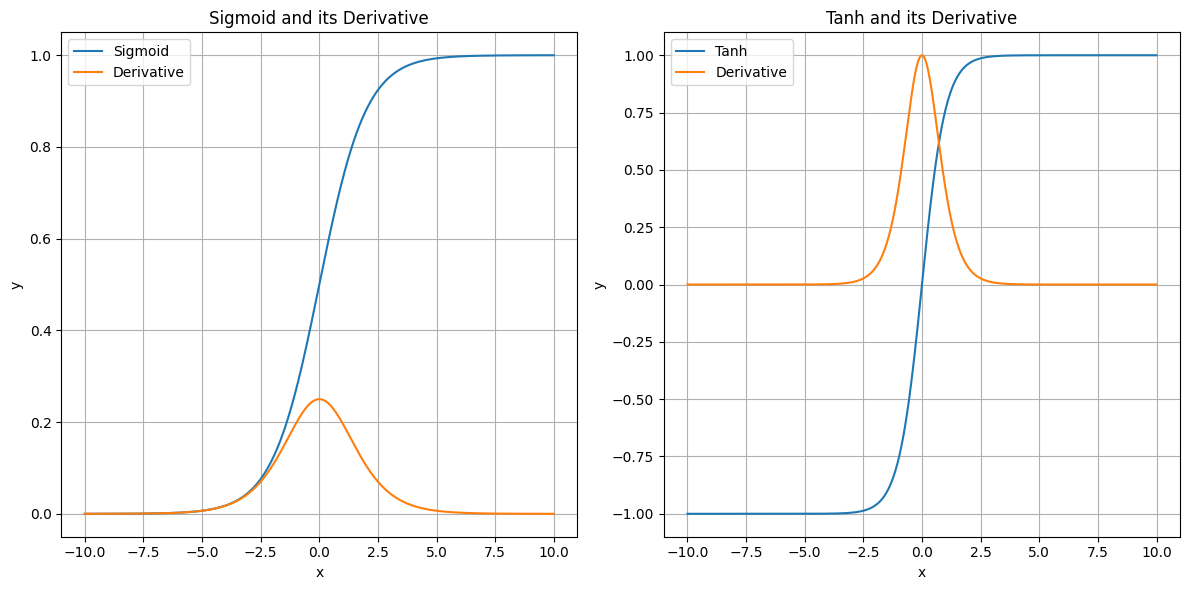

Notice how the derivatives of sigmoid and tanh approach zero for large positive or negative inputs.
This causes the vanishing gradient problem in deep networks.


In [6]:
x_range = np.linspace(-10, 10, 1000)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_range, sigmoid(x_range), label='Sigmoid')
plt.plot(x_range, sigmoid_derivative(x_range), label='Derivative')
plt.grid(True)
plt.title('Sigmoid and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, tanh(x_range), label='Tanh')
plt.plot(x_range, tanh_derivative(x_range), label='Derivative')
plt.grid(True)
plt.title('Tanh and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print("Notice how the derivatives of sigmoid and tanh approach zero for large positive or negative inputs.")
print("This causes the vanishing gradient problem in deep networks.")


### Dying ReLU Problem

### Demonstrate dying ReLU problem

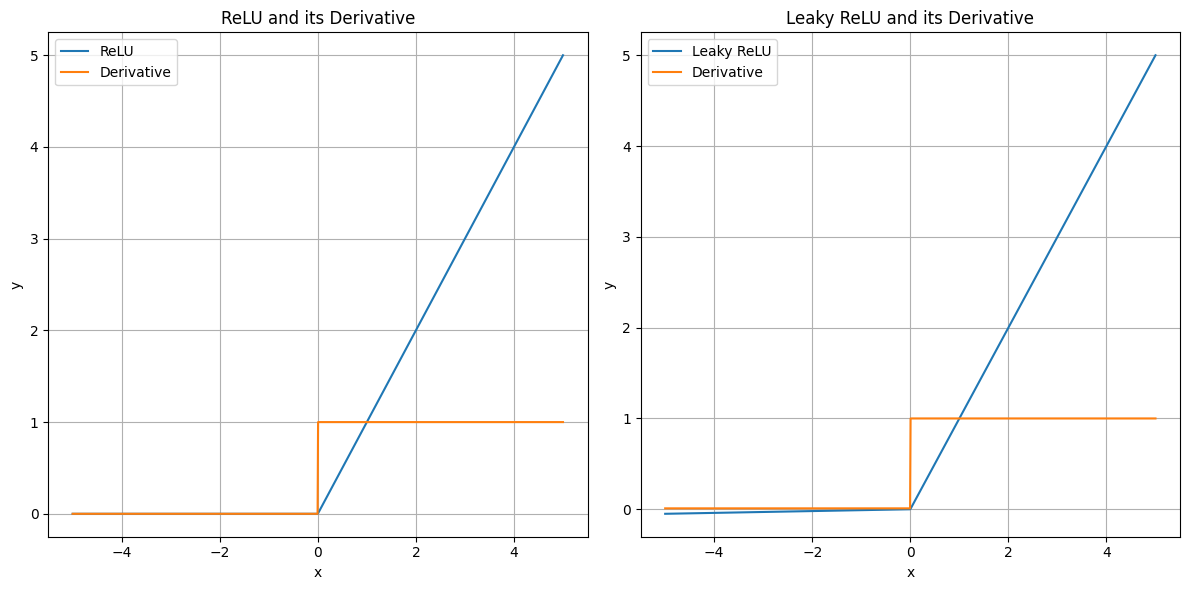

Notice how the ReLU derivative is exactly zero for all negative inputs.
This can cause neurons to 'die' if they consistently receive negative inputs.
Leaky ReLU helps solve this by allowing a small gradient for negative values.


In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, relu_derivative(x), label='Derivative')
plt.grid(True)
plt.title('ReLU and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.plot(x, leaky_relu_derivative(x), label='Derivative')
plt.grid(True)
plt.title('Leaky ReLU and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

print("Notice how the ReLU derivative is exactly zero for all negative inputs.")
print("This can cause neurons to 'die' if they consistently receive negative inputs.")
print("Leaky ReLU helps solve this by allowing a small gradient for negative values.")


## 4. Creating a Simple Dataset

## Let's create a dataset to test different activation functions:

## Create a spiral dataset


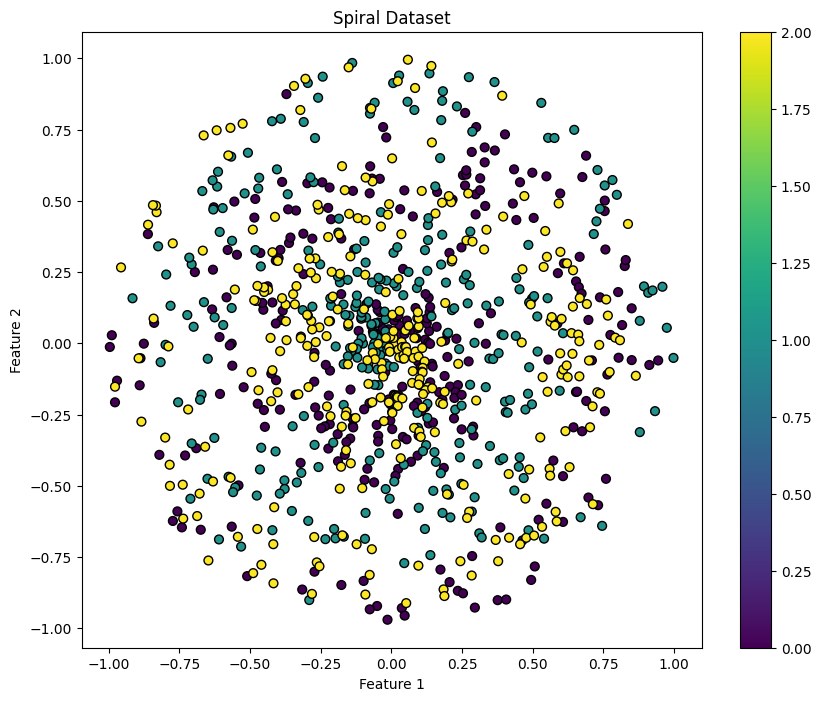

In [8]:
def generate_spiral_data(points_per_class=300, classes=3, noise=0.5):
    X = np.zeros((points_per_class * classes, 2))
    y = np.zeros(points_per_class * classes, dtype=np.int32)

    for class_idx in range(classes):
        ix = range(points_per_class * class_idx, points_per_class * (class_idx + 1))
        r = np.linspace(0.0, 1, points_per_class)  # radius
        t = np.linspace(class_idx * 4, (class_idx + 1) * 4, points_per_class) + np.random.randn(points_per_class) * noise  # theta
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = class_idx

    return X, y
X, y = generate_spiral_data(points_per_class=300, classes=3, noise=0.5)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, s=40, edgecolors='k')
plt.title('Spiral Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()



In [9]:
# One-hot encode the labels for multi-class classification
y_one_hot = tf.keras.utils.to_categorical(y, 3)


### 5. Comparing Activation Functions on a Classification Task
### Create a model with specified activation function


In [10]:
def create_model(hidden_activation, output_activation='softmax'):
    model = Sequential([
        Dense(100, activation=hidden_activation, input_shape=(2,)),
        Dense(100, activation=hidden_activation),
        Dense(3, activation=output_activation)
    ])

    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Training model with sigmoid activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sigmoid - Final accuracy: 0.3767


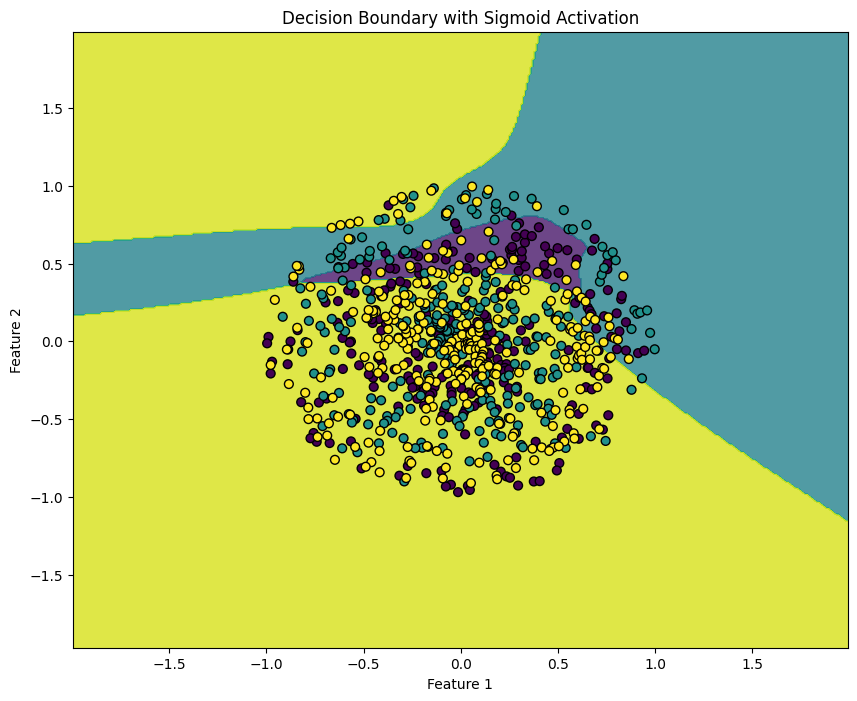

Training model with tanh activation...
Tanh - Final accuracy: 0.3489


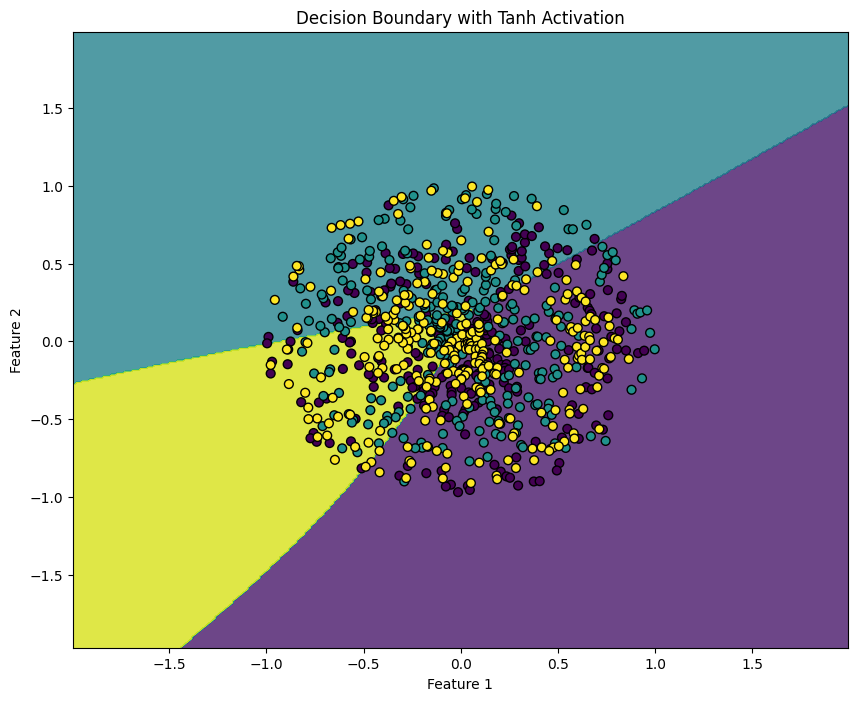

Training model with relu activation...
Relu - Final accuracy: 0.6122


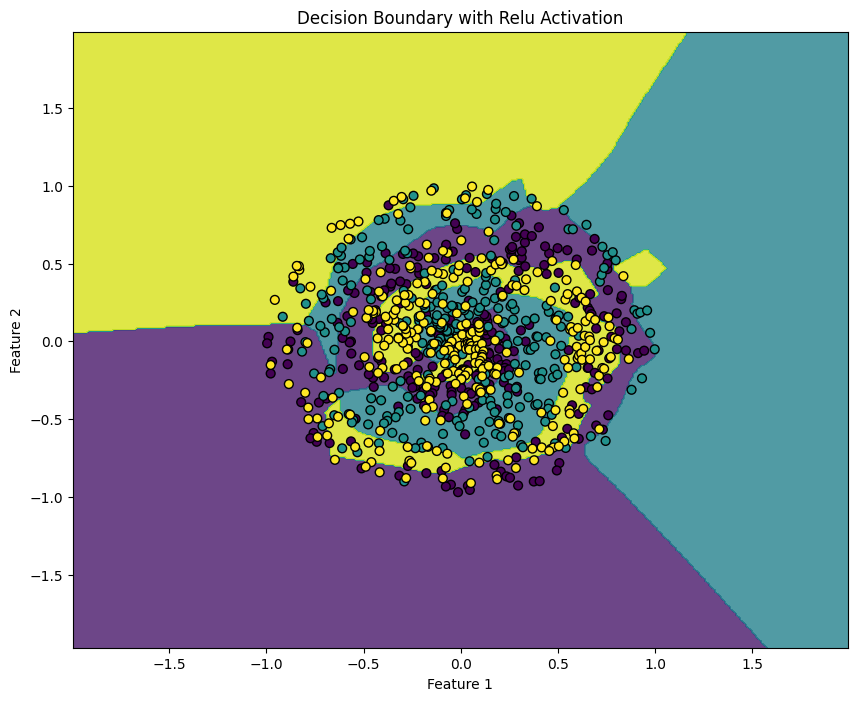

Training model with elu activation...
Elu - Final accuracy: 0.3422


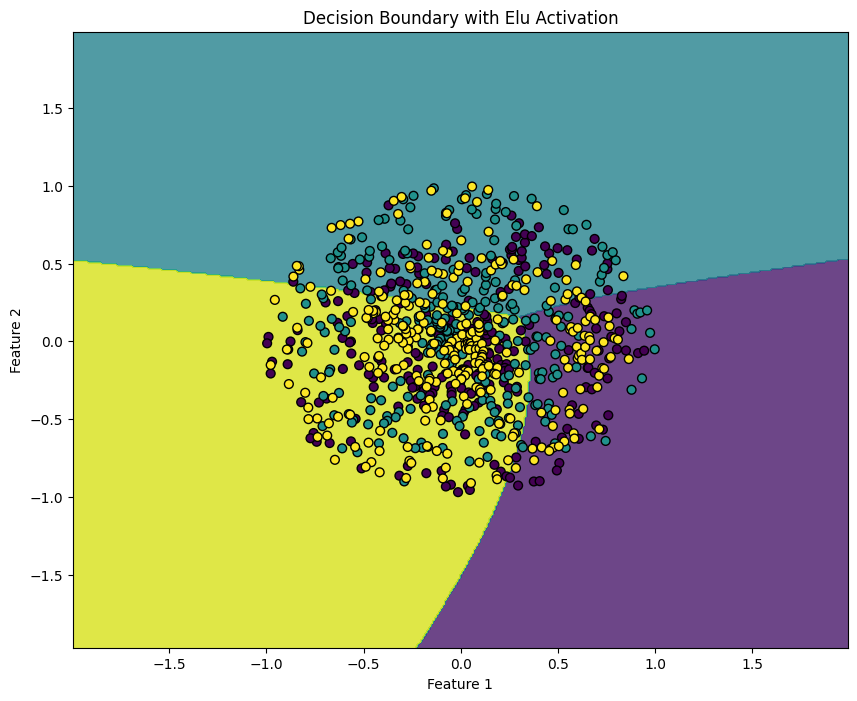

Training model with leaky_relu activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Leaky_relu - Final accuracy: 0.6178


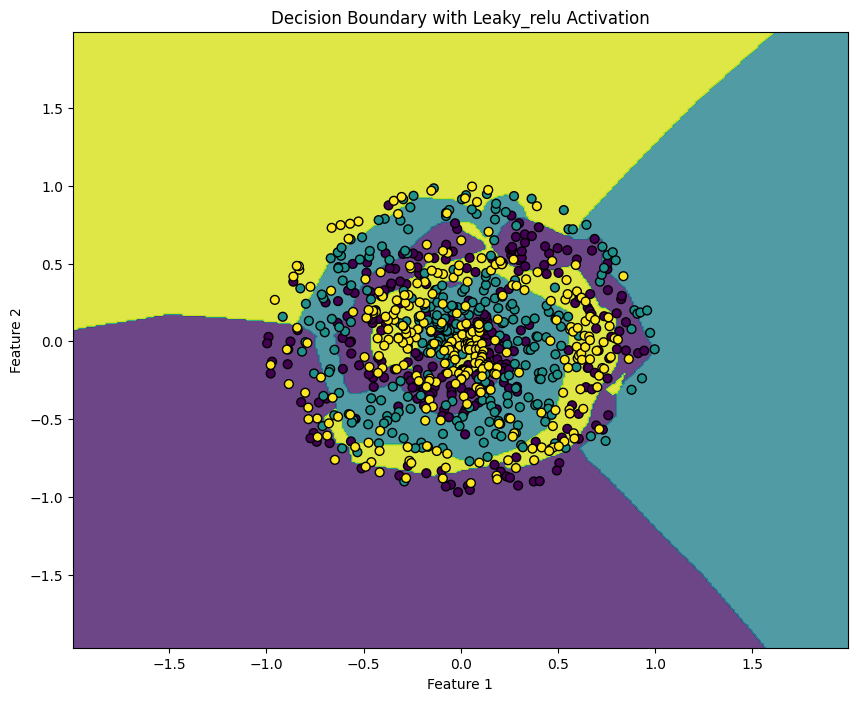

In [11]:
# Train models with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'leaky_relu']
histories = {}

for activation in activation_functions:
    print(f"Training model with {activation} activation...")
    if activation == 'leaky_relu':
        # For leaky_relu, we need to use a different approach
        model = Sequential([
            Dense(100, input_shape=(2,)),
            tf.keras.layers.LeakyReLU(alpha=0.01),
            Dense(100),
            tf.keras.layers.LeakyReLU(alpha=0.01),
            Dense(3, activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        model = create_model(activation)

    history = model.fit(X, y_one_hot, epochs=100, batch_size=32, verbose=0)
    histories[activation] = history

    # Evaluate the model
    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    print(f"{activation.capitalize()} - Final accuracy: {accuracy:.4f}")

    # Create a meshgrid for decision boundary visualization
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, s=40, edgecolors='k')
    plt.title(f'Decision Boundary with {activation.capitalize()} Activation')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

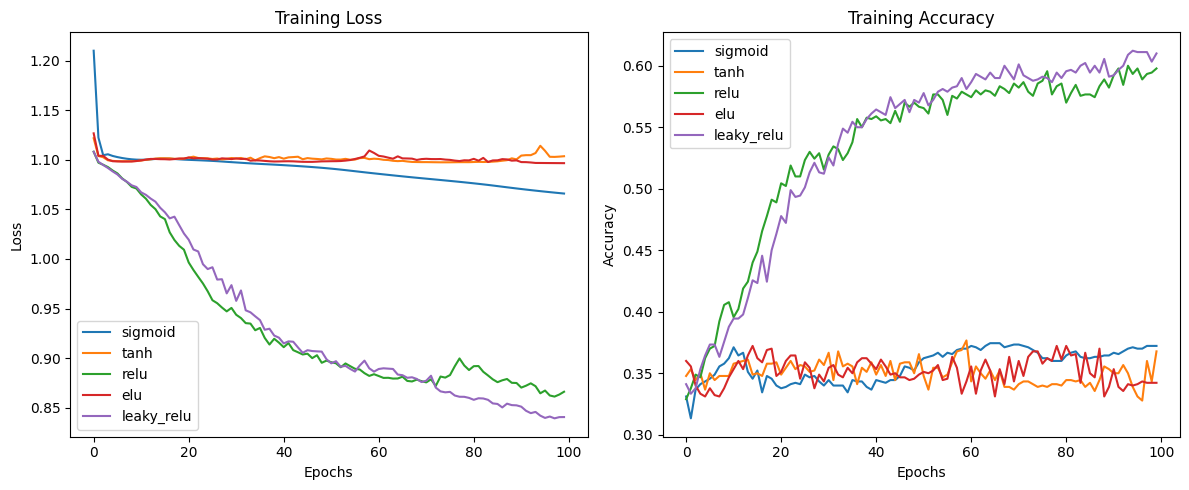

In [12]:
# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for activation, history in histories.items():
    plt.plot(history.history['loss'], label=activation)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for activation, history in histories.items():
    plt.plot(history.history['accuracy'], label=activation)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 6. Practical Guidelines for Choosing Activation Functions
## Print guidelines for choosing activation functions


In [13]:
guidelines = {
    "Hidden Layers": {
        "ReLU": "Most common choice for hidden layers. Fast to compute and helps with vanishing gradient.",
        "Leaky ReLU": "Use when dying ReLU is a concern, especially in deep networks.",
        "ELU": "Can provide better accuracy than ReLU but computationally more expensive.",
        "Tanh": "Good for recurrent networks (RNNs, LSTMs), normalized data, or if you need negative values.",
        "SELU": "Self-normalizing, good for very deep networks.",
        "Swish": "x * sigmoid(x), sometimes outperforms ReLU in deep networks."
    },
    "Output Layer": {
        "Regression": "Linear (no activation) for unbounded values; ReLU for positive values only.",
        "Binary Classification": "Sigmoid to output probability between 0 and 1.",
        "Multi-class Classification": "Softmax to output probability distribution across classes."
    },
    "Special Cases": {
        "Vanishing Gradient": "Use ReLU, Leaky ReLU, ELU, or SELU.",
        "Deep Networks": "ReLU variants or SELU; consider residual connections.",
        "RNNs/LSTMs": "Tanh or ReLU depending on the architecture."
    }
}

print("Guidelines for Choosing Activation Functions:\n")
for category, funcs in guidelines.items():
    print(f"## {category}:")
    for func, desc in funcs.items():
        print(f"- {func}: {desc}")
    print()

Guidelines for Choosing Activation Functions:

## Hidden Layers:
- ReLU: Most common choice for hidden layers. Fast to compute and helps with vanishing gradient.
- Leaky ReLU: Use when dying ReLU is a concern, especially in deep networks.
- ELU: Can provide better accuracy than ReLU but computationally more expensive.
- Tanh: Good for recurrent networks (RNNs, LSTMs), normalized data, or if you need negative values.
- SELU: Self-normalizing, good for very deep networks.
- Swish: x * sigmoid(x), sometimes outperforms ReLU in deep networks.

## Output Layer:
- Regression: Linear (no activation) for unbounded values; ReLU for positive values only.
- Binary Classification: Sigmoid to output probability between 0 and 1.
- Multi-class Classification: Softmax to output probability distribution across classes.

## Special Cases:
- Vanishing Gradient: Use ReLU, Leaky ReLU, ELU, or SELU.
- Deep Networks: ReLU variants or SELU; consider residual connections.
- RNNs/LSTMs: Tanh or ReLU depending o



## 7. Advanced Activation Functions

Let's explore some more advanced activation functions:

## Define more modern activation functions


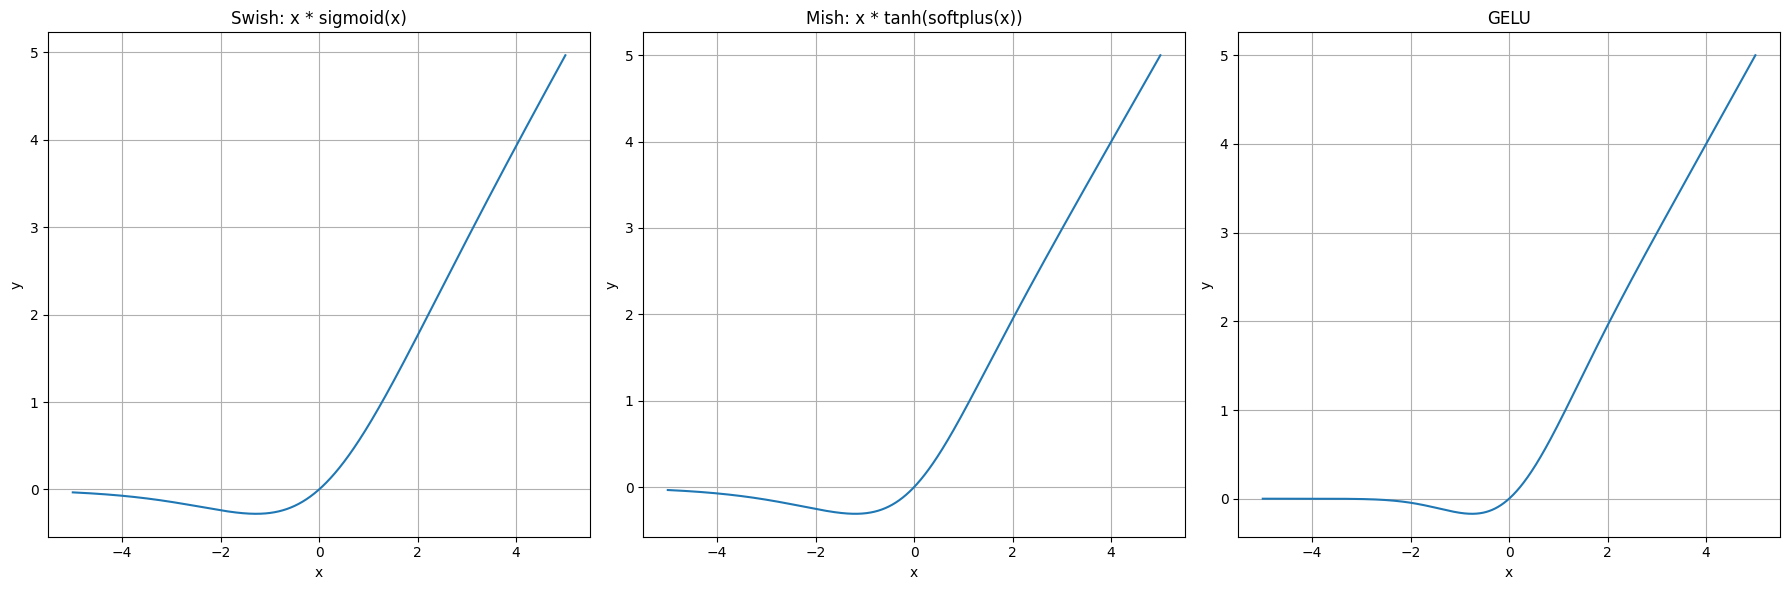

In [14]:
def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

# Plot advanced activation functions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(x, swish(x))
plt.grid(True)
plt.title('Swish: x * sigmoid(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.plot(x, mish(x))
plt.grid(True)
plt.title('Mish: x * tanh(softplus(x))')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.plot(x, gelu(x))
plt.grid(True)
plt.title('GELU')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()